In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.svm import SVC
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df= pd.read_csv('data/df_pre.csv')

In [5]:
column=['SexuponOutcome','Color_pre','DayuponOutcome','Breed_pre','Name','YearMonth', 'Month','AnimalType','BreedMix']

df_X = pd.DataFrame(data = df , columns = column)

df_y = pd.DataFrame(data = df , columns = ['OutcomeType'])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0 , shuffle = True)

In [6]:
df_y.groupby(['OutcomeType']).count()

""
OutcomeType
0
1
2
3
4


In [7]:
print(X_train.shape, type(X_train))
print(y_train.shape, type(y_train))
print(X_test.shape, type(X_test))
print(y_test.shape, type(y_test))

(24056, 9) <class 'pandas.core.frame.DataFrame'>
(24056, 1) <class 'pandas.core.frame.DataFrame'>
(2673, 9) <class 'pandas.core.frame.DataFrame'>
(2673, 1) <class 'pandas.core.frame.DataFrame'>


In [8]:
X_train[column] = X_train[column].astype(float)
X_test[column] = X_test[column].astype(float)

In [9]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)
Y_train

Using TensorFlow backend.


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import regularizers
from keras.layers import Dropout

In [24]:
model = Sequential()

model.add(Dense(10, input_dim=9, activation="sigmoid", kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer=SGD(lr=0.2), loss='categorical_crossentropy', metrics=["accuracy"])

In [25]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=1000, batch_size=50,
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 24056 samples, validate on 2673 samples
Epoch 1/1000
0s - loss: 1.2167 - acc: 0.4641 - val_loss: 1.2618 - val_acc: 0.3483
Epoch 2/1000
0s - loss: 1.2033 - acc: 0.4707 - val_loss: 1.2070 - val_acc: 0.4830
Epoch 3/1000
0s - loss: 1.2031 - acc: 0.4705 - val_loss: 1.2428 - val_acc: 0.4834
Epoch 4/1000
0s - loss: 1.2043 - acc: 0.4702 - val_loss: 1.2827 - val_acc: 0.4646
Epoch 5/1000
0s - loss: 1.2058 - acc: 0.4688 - val_loss: 1.2069 - val_acc: 0.4766
Epoch 6/1000
0s - loss: 1.2010 - acc: 0.4754 - val_loss: 1.2252 - val_acc: 0.4830
Epoch 7/1000
0s - loss: 1.1959 - acc: 0.4744 - val_loss: 1.2731 - val_acc: 0.4762
Epoch 8/1000
0s - loss: 1.1767 - acc: 0.4654 - val_loss: 1.2009 - val_acc: 0.4362
Epoch 9/1000
0s - loss: 1.1561 - acc: 0.4641 - val_loss: 1.1869 - val_acc: 0.4830
Epoch 10/1000
0s - loss: 1.1874 - acc: 0.4734 - val_loss: 1.2341 - val_acc: 0.4837
Epoch 11/1000
0s - loss: 1.1991 - acc: 0.4692 - val_loss: 1.2083 - val_acc: 0.3483
Epoch 12/1000
0s - loss: 1.1691 - acc: 0.4633 -

0s - loss: 1.2059 - acc: 0.4616 - val_loss: 1.2029 - val_acc: 0.4800
Epoch 101/1000
0s - loss: 1.1972 - acc: 0.4691 - val_loss: 1.2072 - val_acc: 0.4785
Epoch 102/1000
0s - loss: 1.2494 - acc: 0.4011 - val_loss: 1.2540 - val_acc: 0.4044
Epoch 103/1000
0s - loss: 1.2422 - acc: 0.4085 - val_loss: 1.2258 - val_acc: 0.4848
Epoch 104/1000
0s - loss: 1.1966 - acc: 0.4726 - val_loss: 1.2275 - val_acc: 0.3483
Epoch 105/1000
0s - loss: 1.2047 - acc: 0.4341 - val_loss: 1.2023 - val_acc: 0.3895
Epoch 106/1000
0s - loss: 1.2540 - acc: 0.3935 - val_loss: 1.2551 - val_acc: 0.4037
Epoch 107/1000
0s - loss: 1.2416 - acc: 0.4070 - val_loss: 1.2928 - val_acc: 0.4037
Epoch 108/1000
0s - loss: 1.2575 - acc: 0.3927 - val_loss: 1.2246 - val_acc: 0.3483
Epoch 109/1000
0s - loss: 1.2032 - acc: 0.4652 - val_loss: 1.3328 - val_acc: 0.3483
Epoch 110/1000
0s - loss: 1.1986 - acc: 0.4677 - val_loss: 1.2031 - val_acc: 0.3887
Epoch 111/1000
0s - loss: 1.2008 - acc: 0.4629 - val_loss: 1.4779 - val_acc: 0.3483
Epoch 1

0s - loss: 1.2037 - acc: 0.4703 - val_loss: 1.3371 - val_acc: 0.3483
Epoch 199/1000
0s - loss: 1.2006 - acc: 0.4576 - val_loss: 1.3518 - val_acc: 0.3483
Epoch 200/1000
0s - loss: 1.2162 - acc: 0.4503 - val_loss: 1.2494 - val_acc: 0.4437
Epoch 201/1000
0s - loss: 1.2072 - acc: 0.4611 - val_loss: 1.2014 - val_acc: 0.4845
Epoch 202/1000
0s - loss: 1.2015 - acc: 0.4707 - val_loss: 1.2943 - val_acc: 0.4673
Epoch 203/1000
0s - loss: 1.2045 - acc: 0.4681 - val_loss: 1.3897 - val_acc: 0.4052
Epoch 204/1000
0s - loss: 1.2023 - acc: 0.4677 - val_loss: 1.2865 - val_acc: 0.4837
Epoch 205/1000
0s - loss: 1.1973 - acc: 0.4740 - val_loss: 1.2990 - val_acc: 0.4052
Epoch 206/1000
0s - loss: 1.2115 - acc: 0.4452 - val_loss: 1.2862 - val_acc: 0.4025
Epoch 207/1000
0s - loss: 1.2037 - acc: 0.4572 - val_loss: 1.2930 - val_acc: 0.4044
Epoch 208/1000
0s - loss: 1.1948 - acc: 0.4721 - val_loss: 1.2494 - val_acc: 0.4721
Epoch 209/1000
0s - loss: 1.1947 - acc: 0.4705 - val_loss: 1.2125 - val_acc: 0.4804
Epoch 2

0s - loss: 1.2549 - acc: 0.3871 - val_loss: 1.3811 - val_acc: 0.4037
Epoch 297/1000
0s - loss: 1.2566 - acc: 0.3817 - val_loss: 1.2645 - val_acc: 0.4037
Epoch 298/1000
0s - loss: 1.2554 - acc: 0.3874 - val_loss: 1.4042 - val_acc: 0.4037
Epoch 299/1000
0s - loss: 1.2493 - acc: 0.3887 - val_loss: 1.3203 - val_acc: 0.3906
Epoch 300/1000
0s - loss: 1.2139 - acc: 0.4449 - val_loss: 1.3009 - val_acc: 0.3483
Epoch 301/1000
0s - loss: 1.2014 - acc: 0.4694 - val_loss: 1.2187 - val_acc: 0.4774
Epoch 302/1000
0s - loss: 1.2017 - acc: 0.4682 - val_loss: 1.1841 - val_acc: 0.4830
Epoch 303/1000
0s - loss: 1.2000 - acc: 0.4700 - val_loss: 1.3276 - val_acc: 0.4688
Epoch 304/1000
0s - loss: 1.2452 - acc: 0.4086 - val_loss: 1.3609 - val_acc: 0.3483
Epoch 305/1000
0s - loss: 1.2597 - acc: 0.3847 - val_loss: 1.2453 - val_acc: 0.4044
Epoch 306/1000
0s - loss: 1.2167 - acc: 0.4423 - val_loss: 1.4086 - val_acc: 0.3483
Epoch 307/1000
0s - loss: 1.2024 - acc: 0.4639 - val_loss: 1.2665 - val_acc: 0.4508
Epoch 3

0s - loss: 1.2047 - acc: 0.4569 - val_loss: 1.4373 - val_acc: 0.3483
Epoch 395/1000
0s - loss: 1.2000 - acc: 0.4650 - val_loss: 1.2221 - val_acc: 0.4781
Epoch 396/1000
0s - loss: 1.2020 - acc: 0.4646 - val_loss: 1.5917 - val_acc: 0.3483
Epoch 397/1000
0s - loss: 1.1989 - acc: 0.4703 - val_loss: 1.2678 - val_acc: 0.3483
Epoch 398/1000
0s - loss: 1.1987 - acc: 0.4679 - val_loss: 1.5046 - val_acc: 0.3483
Epoch 399/1000
0s - loss: 1.2027 - acc: 0.4653 - val_loss: 1.2038 - val_acc: 0.4845
Epoch 400/1000
0s - loss: 1.2026 - acc: 0.4608 - val_loss: 1.1990 - val_acc: 0.4830
Epoch 401/1000
0s - loss: 1.2070 - acc: 0.4599 - val_loss: 1.2129 - val_acc: 0.4845
Epoch 402/1000
0s - loss: 1.1983 - acc: 0.4709 - val_loss: 1.2938 - val_acc: 0.2686
Epoch 403/1000
0s - loss: 1.2001 - acc: 0.4699 - val_loss: 1.2847 - val_acc: 0.4845
Epoch 404/1000
0s - loss: 1.1990 - acc: 0.4659 - val_loss: 1.2371 - val_acc: 0.4845
Epoch 405/1000
0s - loss: 1.1980 - acc: 0.4713 - val_loss: 1.2102 - val_acc: 0.4770
Epoch 4

0s - loss: 1.1928 - acc: 0.4552 - val_loss: 1.2243 - val_acc: 0.3483
Epoch 493/1000
0s - loss: 1.2035 - acc: 0.4669 - val_loss: 1.2569 - val_acc: 0.3483
Epoch 494/1000
0s - loss: 1.2025 - acc: 0.4658 - val_loss: 1.2575 - val_acc: 0.3483
Epoch 495/1000
0s - loss: 1.2267 - acc: 0.4262 - val_loss: 1.1995 - val_acc: 0.4770
Epoch 496/1000
0s - loss: 1.2015 - acc: 0.4540 - val_loss: 1.2721 - val_acc: 0.4037
Epoch 497/1000
0s - loss: 1.2043 - acc: 0.4677 - val_loss: 1.1859 - val_acc: 0.4826
Epoch 498/1000
0s - loss: 1.2047 - acc: 0.4665 - val_loss: 1.2040 - val_acc: 0.4841
Epoch 499/1000
0s - loss: 1.2061 - acc: 0.4592 - val_loss: 1.2358 - val_acc: 0.4826
Epoch 500/1000
0s - loss: 1.2009 - acc: 0.4679 - val_loss: 1.1891 - val_acc: 0.4796
Epoch 501/1000
0s - loss: 1.2054 - acc: 0.4603 - val_loss: 1.2163 - val_acc: 0.3483
Epoch 502/1000
0s - loss: 1.1987 - acc: 0.4654 - val_loss: 1.2795 - val_acc: 0.4837
Epoch 503/1000
0s - loss: 1.2022 - acc: 0.4711 - val_loss: 1.2049 - val_acc: 0.4830
Epoch 5

0s - loss: 1.2583 - acc: 0.3859 - val_loss: 1.5207 - val_acc: 0.4037
Epoch 591/1000
0s - loss: 1.2581 - acc: 0.3838 - val_loss: 1.3182 - val_acc: 0.3483
Epoch 592/1000
0s - loss: 1.2234 - acc: 0.3992 - val_loss: 1.2697 - val_acc: 0.4774
Epoch 593/1000
0s - loss: 1.2066 - acc: 0.4452 - val_loss: 1.2529 - val_acc: 0.3483
Epoch 594/1000
0s - loss: 1.2105 - acc: 0.4585 - val_loss: 1.2711 - val_acc: 0.3483
Epoch 595/1000
0s - loss: 1.2119 - acc: 0.4536 - val_loss: 1.6358 - val_acc: 0.3483
Epoch 596/1000
0s - loss: 1.2011 - acc: 0.4699 - val_loss: 1.2077 - val_acc: 0.4834
Epoch 597/1000
0s - loss: 1.2003 - acc: 0.4680 - val_loss: 1.2509 - val_acc: 0.2911
Epoch 598/1000
0s - loss: 1.2074 - acc: 0.4624 - val_loss: 1.4693 - val_acc: 0.3483
Epoch 599/1000
0s - loss: 1.2063 - acc: 0.4681 - val_loss: 1.2591 - val_acc: 0.4770
Epoch 600/1000
0s - loss: 1.2029 - acc: 0.4690 - val_loss: 1.2252 - val_acc: 0.4762
Epoch 601/1000
0s - loss: 1.2240 - acc: 0.4422 - val_loss: 1.2516 - val_acc: 0.4044
Epoch 6

0s - loss: 1.2013 - acc: 0.4712 - val_loss: 1.2413 - val_acc: 0.4804
Epoch 689/1000
0s - loss: 1.2032 - acc: 0.4648 - val_loss: 1.3123 - val_acc: 0.2649
Epoch 690/1000
0s - loss: 1.2238 - acc: 0.4426 - val_loss: 1.2014 - val_acc: 0.4837
Epoch 691/1000
0s - loss: 1.2023 - acc: 0.4672 - val_loss: 1.2659 - val_acc: 0.3483
Epoch 692/1000
0s - loss: 1.2110 - acc: 0.4571 - val_loss: 1.2035 - val_acc: 0.4834
Epoch 693/1000
0s - loss: 1.1972 - acc: 0.4650 - val_loss: 1.2577 - val_acc: 0.4680
Epoch 694/1000
0s - loss: 1.2046 - acc: 0.4551 - val_loss: 1.3812 - val_acc: 0.4040
Epoch 695/1000
0s - loss: 1.2254 - acc: 0.4323 - val_loss: 1.2620 - val_acc: 0.4744
Epoch 696/1000
0s - loss: 1.2082 - acc: 0.4622 - val_loss: 1.2439 - val_acc: 0.4721
Epoch 697/1000
0s - loss: 1.2021 - acc: 0.4684 - val_loss: 1.3226 - val_acc: 0.3483
Epoch 698/1000
0s - loss: 1.2032 - acc: 0.4675 - val_loss: 1.2882 - val_acc: 0.4789
Epoch 699/1000
0s - loss: 1.2105 - acc: 0.4578 - val_loss: 1.3313 - val_acc: 0.3483
Epoch 7

0s - loss: 1.2444 - acc: 0.3853 - val_loss: 1.2797 - val_acc: 0.3483
Epoch 787/1000
0s - loss: 1.2585 - acc: 0.3886 - val_loss: 1.3631 - val_acc: 0.4037
Epoch 788/1000
0s - loss: 1.2458 - acc: 0.3869 - val_loss: 1.3271 - val_acc: 0.4044
Epoch 789/1000
0s - loss: 1.2597 - acc: 0.3859 - val_loss: 1.4523 - val_acc: 0.3483
Epoch 790/1000
0s - loss: 1.2588 - acc: 0.3896 - val_loss: 1.2895 - val_acc: 0.3483
Epoch 791/1000
0s - loss: 1.2566 - acc: 0.3860 - val_loss: 1.2623 - val_acc: 0.4037
Epoch 792/1000
0s - loss: 1.2570 - acc: 0.3827 - val_loss: 1.2863 - val_acc: 0.4037
Epoch 793/1000
0s - loss: 1.2549 - acc: 0.3891 - val_loss: 1.3916 - val_acc: 0.3483
Epoch 794/1000
0s - loss: 1.2537 - acc: 0.3918 - val_loss: 1.2803 - val_acc: 0.4037
Epoch 795/1000
0s - loss: 1.2267 - acc: 0.4142 - val_loss: 1.2816 - val_acc: 0.4774
Epoch 796/1000
0s - loss: 1.2068 - acc: 0.4597 - val_loss: 1.2485 - val_acc: 0.4617
Epoch 797/1000
0s - loss: 1.2055 - acc: 0.4537 - val_loss: 1.2314 - val_acc: 0.4209
Epoch 7

0s - loss: 1.2154 - acc: 0.4459 - val_loss: 1.2915 - val_acc: 0.4044
Epoch 885/1000
0s - loss: 1.2071 - acc: 0.4559 - val_loss: 1.2192 - val_acc: 0.4646
Epoch 886/1000
0s - loss: 1.2075 - acc: 0.4584 - val_loss: 1.2566 - val_acc: 0.4669
Epoch 887/1000
0s - loss: 1.1995 - acc: 0.4720 - val_loss: 1.2446 - val_acc: 0.4834
Epoch 888/1000
0s - loss: 1.2195 - acc: 0.4476 - val_loss: 1.3552 - val_acc: 0.3483
Epoch 889/1000
0s - loss: 1.2164 - acc: 0.4475 - val_loss: 1.2057 - val_acc: 0.4830
Epoch 890/1000
0s - loss: 1.2039 - acc: 0.4640 - val_loss: 1.2731 - val_acc: 0.4306
Epoch 891/1000
0s - loss: 1.2605 - acc: 0.3883 - val_loss: 1.3881 - val_acc: 0.4037
Epoch 892/1000
0s - loss: 1.2594 - acc: 0.3883 - val_loss: 1.2845 - val_acc: 0.3483
Epoch 893/1000
0s - loss: 1.2326 - acc: 0.4218 - val_loss: 1.2643 - val_acc: 0.4733
Epoch 894/1000
0s - loss: 1.1975 - acc: 0.4645 - val_loss: 1.2094 - val_acc: 0.4358
Epoch 895/1000
0s - loss: 1.2159 - acc: 0.4201 - val_loss: 1.2773 - val_acc: 0.3483
Epoch 8

0s - loss: 1.2479 - acc: 0.4055 - val_loss: 1.2119 - val_acc: 0.4830
Epoch 983/1000
0s - loss: 1.2133 - acc: 0.4542 - val_loss: 1.2093 - val_acc: 0.4212
Epoch 984/1000
0s - loss: 1.2061 - acc: 0.4626 - val_loss: 1.2770 - val_acc: 0.4834
Epoch 985/1000
0s - loss: 1.2072 - acc: 0.4626 - val_loss: 1.2749 - val_acc: 0.4037
Epoch 986/1000
0s - loss: 1.2546 - acc: 0.3987 - val_loss: 1.2841 - val_acc: 0.3490
Epoch 987/1000
0s - loss: 1.2024 - acc: 0.4617 - val_loss: 1.2457 - val_acc: 0.3483
Epoch 988/1000
0s - loss: 1.2069 - acc: 0.4626 - val_loss: 1.2767 - val_acc: 0.4845
Epoch 989/1000
0s - loss: 1.2167 - acc: 0.4453 - val_loss: 1.3104 - val_acc: 0.4040
Epoch 990/1000
0s - loss: 1.2628 - acc: 0.3880 - val_loss: 1.3908 - val_acc: 0.4044
Epoch 991/1000
0s - loss: 1.2158 - acc: 0.4561 - val_loss: 1.3168 - val_acc: 0.4044
Epoch 992/1000
0s - loss: 1.2070 - acc: 0.4662 - val_loss: 1.2975 - val_acc: 0.3483
Epoch 993/1000
0s - loss: 1.2041 - acc: 0.4645 - val_loss: 1.2003 - val_acc: 0.4826
Epoch 9

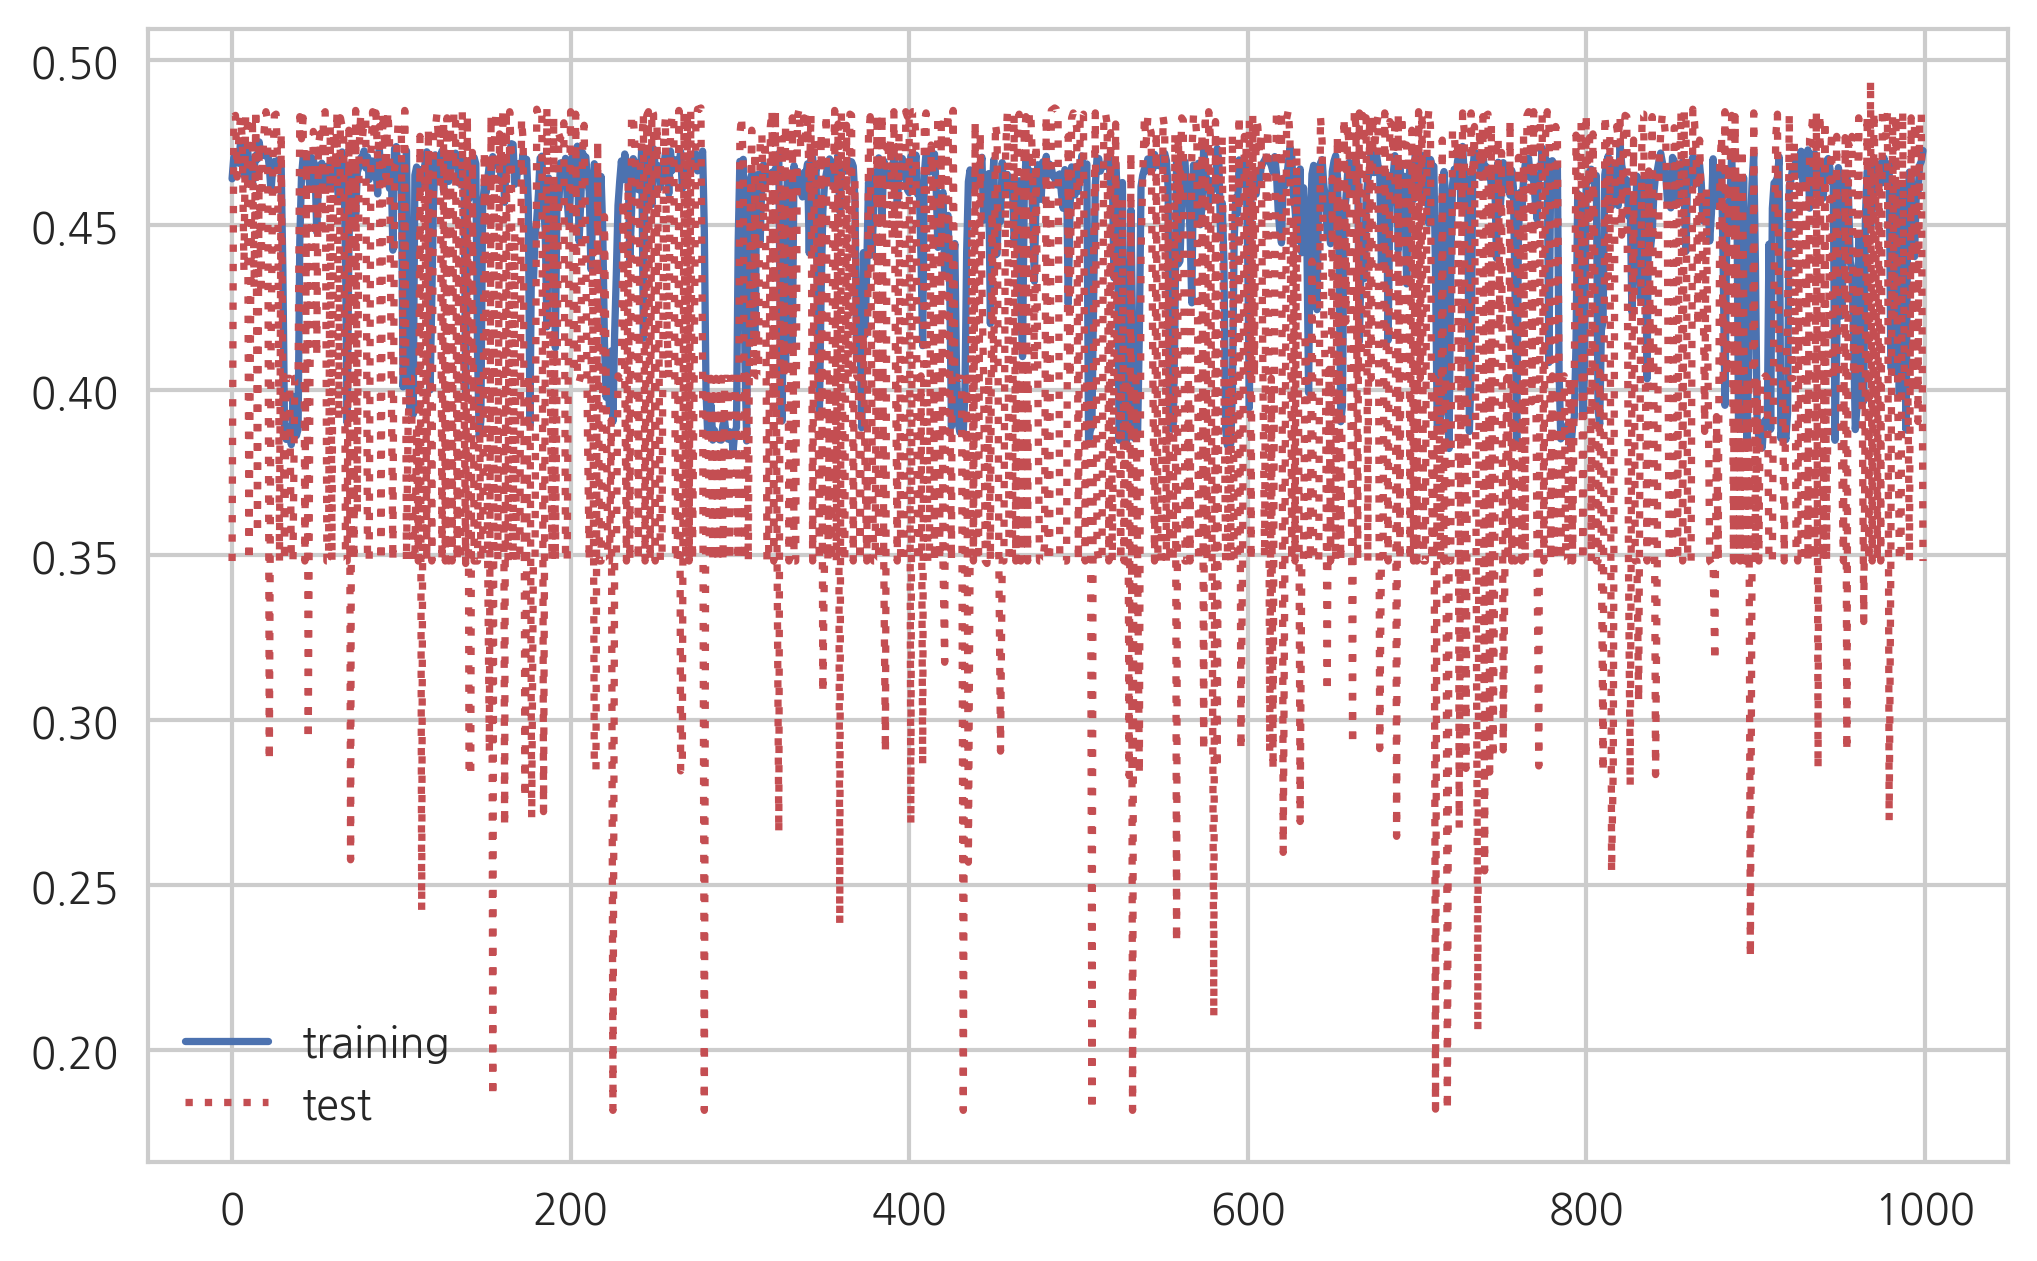

In [26]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
#plt.plot(hist.history['val_loss'], 'c-', label="loss")
plt.legend()
plt.show()